## Andrea Calef

    💁‍♂️ My details: a.calef@uea.ac.uk; office hours Wednesdays 4-6pm on Teams. Or meet live by appointment!

The materials for this week are available as a Jupyter notebook. Jupyter notebooks mix rich text with runnable python code. So, you can follow along with this lecture, run the python examples, and even add your own notes and code. To do this go to

https://mybinder.org/v2/gh/tturocy/eco7026a/HEAD

Alternatively, you can copy and paste code from here into the python command line or an IDE such as Spyder.

### Using Jupyter notebooks

To get your own copy of this notebook, choose **File** above then **Download**.

When you have done that, click in the field below, and either press the play button or type Shift+Enter. This executes the Python cell.

## Notes: necessary libraries to replicate this lecture.

import pandas_datareader 
<br>
import pandas as pd 
<br>
import pyarrow as pa 
<br>
import pyarrow.parquet as pq 
<br>
import matplotlib.pyplot as plt 

The first time you need to install pandas_datareader: pip install pandas_datareader

The first time you need to install pyarrow: pip install pyarrow 

According to Pythonic and PEP-8, all the libraries should be recalled at the beginning of your .py/.ipynb file. 

## ECO-7026A Lecture 03

### Main topic: Data Visualisation using Python.

We will download some data and draw the following graphs:

* <a href='https://www.splashlearn.com/math-vocabulary/geometry/line-graph'>Line graph</a>
* <a href='https://chartio.com/learn/charts/what-is-a-scatter-plot/'>Scatter plot</a>
* <a href='https://chartio.com/learn/charts/bar-chart-complete-guide/'>Bar chart</a>
* <a href='https://chartio.com/learn/charts/histogram-complete-guide/'>Histogram</a>
* <a href='https://chartio.com/learn/charts/pie-chart-complete-guide/'>Pie chart</a>
* <a href='https://datavizproject.com/data-type/three-dimensional-stream-graph/'>3D graph</a>
* <a href='https://www.itl.nist.gov/div898/handbook/eda/section3/contour.htm'>Contour plot</a>

Through **pandas_datareader** we can look for certain data stored in <a href='https://data.worldbank.org/'>World Bank Database</a>'s website and download them without directly accessing through our browser. 

Actually, <a href='https://pandas-datareader.readthedocs.io/en/latest/'>**pandas_datareader**</a> allows for getting data from many public databases. Please read its documentation page. 

In [ ]:
import pandas_datareader as pdr 
from pandas_datareader import wb
matches = wb.search('government.*debt.*gdp')
matches

Let us choose the proper index and download the needed data. 

In [ ]:
debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country="all", start=2005, end=2016)
debt

We have just downloaded panel data (time series for many countries - countries represent the cross-section). 
<br>
But how should it be structured? 
<br>
Its shape can be modified with **stack()** and **unstack**, which are the equivalent of Stata's "long" and "wide", respectively. See <a href='https://pandas.pydata.org/docs/user_guide/reshaping.html'>here</a> for more information. 

In [ ]:
debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country="all", start=2005, end=2016).unstack()
debt

In [ ]:
debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country="all", start=2005, end=2016).unstack(1)
debt

In [ ]:
debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country="all", start=2005, end=2016).unstack(0)
debt

In [ ]:
debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country="all", start=2005, end=2016).stack().unstack(0)
debt

In [ ]:
debt1 = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country="all", start=2005, end=2016).stack()
import pandas as pd 
with pd.option_context('display.max_rows', None, 'display.max_columns', None): print(debt1)

In [ ]:
debt2 = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country="all", start=2005, end=2016).stack(dropna=False).unstack(0)
debt2

In [ ]:
del [[debt, debt1, debt2]]

Note: we used a <a href='https://www.martinfowler.com/bliki/FluentInterface.html'>**fluent interface**</a>, as we need to get used to it, but please split the code if needed.

Let us run the following code. 

In [ ]:
debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country="all", start=2005, end=2016).stack().unstack(0)
debt

In [ ]:
debt.index = debt.index.droplevel(1)
debt

**Question:** Was there a faster way to achieve the same outcome? (See above.)

In [ ]:
debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country="all", start=2005, end=2016).unstack(0).dropna()
debt

It did not really work. It has erased all the rows ad no columns. 

In [ ]:
debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country="all", start=2005, end=2016).unstack(0).dropna(axis='columns')
debt

It worked and the panel data is balanced, but we may have eliminated some useful information. Let us try again. See <a href='https://pynative.com/pandas-drop-na-columns-from-dataframe/'>here</a> for more information. 

In [ ]:
debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country="all", start=2005, end=2016).unstack(0).dropna(axis='columns', how='all')
debt

We are now ready to computed descriptive statistics for the whole data set or part of it.
<br>
<br>
Let us find the kurthosis related to 2005 data. 
<br>
<br>
How do we locate it? See more <a href='https://pandas.pydata.org/docs/user_guide/indexing.html#'>here</a>. Two ways:
* **loc[]** - label. 
* **iloc[]** - position. 

In [ ]:
print(debt.loc["2005"].kurtosis())
print(debt.iloc[0].kurtosis())

We can save our data set in many data formats. 

In [ ]:
debt.to_csv('debt.csv')
debt.to_stata('debt.dta')
debt.to_json('debt.json')
debt.to_pickle('debt.pkl')
debt.to_parquet('debt.parquet')
debt.to_latex('debt.tex')

Please click on the following hyperlinks for additional information about some data formats:

* <a href='https://fileinfo.com/extension/json'>.json</a>
<br>
<br>
* <a href='https://www.databricks.com/glossary/what-is-parquet'>.parquet</a>
<br>
<br>
* <a href='https://pythonnumericalmethods.berkeley.edu/notebooks/chapter11.03-Pickle-Files.html'>.pickle</a>

In [ ]:
del debt
debt = pd.read_csv('https://raw.githubusercontent.com/tturocy/eco7026a/main/week3/debt.csv')
debt

Any comment?

In [ ]:
debt.set_index('year', drop=True)
debt

Something did not work properly. Last week we saw how to fix it ... please let your lecturer know you did it. 

Let us focus on UK and USA data. 

In [ ]:
uk_and_us_debt = debt[['United Kingdom', 'United States']]
print(uk_and_us_debt)

## Line graph

In [ ]:
import matplotlib.pyplot as plt 
graph = uk_and_us_debt.plot()

In [ ]:
graph1 = uk_and_us_debt.plot(lw=2) 
graph1.set_xlabel('Year', fontsize=12) 
graph1.set_ylabel('Debt to GDP (%)', fontsize=12) 
plt.title('Government Debt to GDP (%)') 
plt.show() # show the plot
#plt.savefig('Plot1.png')

Where did we save the file?

In [ ]:
plt.plot().clear()
plt.close()
plt.cla()
plt.clf()

## Scatter plot

Let us focus un population and nominal GDP (in USD) for G20 countries and generate a scatter plot. 

In [ ]:
pop = wb.search('population.*total')
pop

In [ ]:
n_gdp = wb.search('gdp.*current')
n_gdp 

In [ ]:
G20 = ['ARG', 'AUS', 'BRA', 'CAN', 'CHN', 'DEU', 'FRA','GBR', 'IDN', 'IND',
       'ITA', 'JPN', 'KOR', 'MEX', 'RUS', 'SAU', 'TUR', 'USA', 'ZAF']

In [ ]:
pop_and_gdp1 = wb.download(indicator=['SP.POP.TOTL','NY.GDP.MKTP.CD'], country=G20,start=2000, end=2020)
pop_and_gdp1

In [ ]:
pop_and_gdp2 = wb.download(indicator=['SP.POP.TOTL','NY.GDP.MKTP.CD'], country=G20, start=2000, end=2020).stack().unstack()
pop_and_gdp2

Any comment?

Let us rename the columns. Two ways: 

In [ ]:
pop_and_gdp3 = pop_and_gdp2
pop_and_gdp2.rename(columns={'SP.POP.TOTL': 'population', 'NY.GDP.MKTP.CD': 'nominal_gdp'}, inplace = True)
pop_and_gdp3.columns = ['population', 'nominal_gdp'] 

In [ ]:
pop_and_gdp2

In [ ]:
pop_and_gdp3

Any comments?

In [ ]:
pop_and_gdp2000 = pop_and_gdp2.iloc[pop_and_gdp2.index.isin(['2000'], level=1)]
#pop_and_gdp2000.index = pop_and_gdp2000.index.droplevel(1) # remove the index year
pop_and_gdp2020 = pop_and_gdp2.iloc[pop_and_gdp2.index.isin(['2020'], level=1)]
#pop_and_gdp2020.index = pop_and_gdp2020.index.droplevel(1) # remove the index year

In [ ]:
pop_and_gdp2000

In [ ]:
pop_and_gdp2020

In [ ]:
pd.set_option('display.float_format', '{:,.0f}'.format)
print(pop_and_gdp2000)
print(pop_and_gdp2020)

In [ ]:
pop_and_gdp2000.plot.scatter(x='population', y='nominal_gdp', title='Scatter plot of GDP against population (2000)') 
plt.show() # show it 
#plt.savefig('ScatterPlot1.png')

pop_and_gdp2020.plot.scatter(x='population', y='nominal_gdp', title='Scatter plot of GDP against population (2020)') 
plt.show() 

### To add country labels to each plot point some fixes are needed.

I report the full code. 

Any comments?

### Non-misleading comparison

In [ ]:
pop_and_gdp2000.plot.scatter(x='population', y='nominal_gdp', title='Scatter plot of GDP against population (2000)', s=25, c="Green") 
plt.xlim([0, 1500000000])
plt.ylim([0, 22000000000000])
plt.show() 

pop_and_gdp2020.plot.scatter(x='population', y='nominal_gdp', title='Scatter plot of GDP against population (2020)', s=25, c="Green") 
plt.xlim([0, 1500000000])
plt.ylim([0, 22000000000000])
plt.show() 

In [ ]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr 
from pandas_datareader import wb
pop_and_gdp2 = wb.download(indicator=['SP.POP.TOTL','NY.GDP.MKTP.CD'], country=G20,start=2000, end=2020)
pop_and_gdp2.rename(columns={'SP.POP.TOTL': 'population', 'NY.GDP.MKTP.CD': 'nominal_gdp'}, inplace = True)
pop_and_gdp2000 = pop_and_gdp2.iloc[pop_and_gdp2.index.isin(['2000'], level=1)]
#pop_and_gdp2000.index = pop_and_gdp2000.index.droplevel(1) # remove the index year
pop_and_gdp2020 = pop_and_gdp2.iloc[pop_and_gdp2.index.isin(['2020'], level=1)]
#pop_and_gdp2020.index = pop_and_gdp2020.index.droplevel(1) # remove the index year
pd.set_option('display.float_format', '{:,.0f}'.format)

G20 = ['ARG', 'AUS', 'BRA', 'CAN', 'CHN', 'DEU', 'FRA','GBR', 'IDN', 'IND',
       'ITA', 'JPN', 'KOR', 'MEX', 'RUS', 'SAU', 'TUR', 'USA', 'ZAF']

x2000 = pop_and_gdp2000['population']
y2000 = pop_and_gdp2000['nominal_gdp']

plt.figure(figsize=(7,5))
plt.scatter(x2000, y2000,s=12,color="red") 
for i, label in enumerate(G20):
    plt.text(x2000[i], y2000[i],label)
plt.xlabel('population')
plt.ylabel('nominal_gdp')
plt.title('Scatter plot of GDP against population (2000)',fontsize=15)
plt.xlim([0, 1500000000])
plt.ylim([0, 22000000000000])
plt.tight_layout() 
plt.show() # show it 
#plt.savefig('ScatterPlot1.png')

x2020 = pop_and_gdp2020['population']
y2020 = pop_and_gdp2020['nominal_gdp']

plt.figure(figsize=(7,5))
plt.scatter(x2020, y2020,s=12,color="red") 
for i, label in enumerate(G20):
    plt.text(x2020[i], y2020[i],label)
plt.xlabel('population')
plt.ylabel('nominal_gdp')
plt.title('Scatter plot of GDP against population (2020)',fontsize=15)
plt.xlim([0, 1500000000])
plt.ylim([0, 22000000000000])
plt.tight_layout() 
plt.show() 

## Bar chart

In [ ]:
gdp = pop_and_gdp2000['nominal_gdp'] 
graph = gdp.plot(kind='bar') # make bar chart
graph.set_xlabel('Country') 
graph.set_ylabel('GDP in current $'') 
plt.tight_layout() # it improves the formatting 
plt.show()

In [ ]:
print(gdp)

In [ ]:
gdp.index = gdp.index.droplevel(1) 
graph = gdp.plot(kind='bar') 
graph.set_xlabel("Country") 
graph.set_ylabel("GDP in current $") 
plt.tight_layout() 
plt.show()

In [ ]:
gdp = gdp.sort_values(ascending=True)
graph = gdp.plot(kind='bar') 
graph.set_xlabel("Country") 
graph.set_ylabel("GDP in current $") 
plt.tight_layout() 
plt.show()

## Histogram

In [ ]:
gdp.hist() # it generates a 10 bins histogram by default 
plt.show() 
#plt.savefig('Hist.png')

In [ ]:
gdp.hist(bins = 5) # it generates a histogram with 5 bins
plt.show() 

In [ ]:
gdp.skew()

## Pie charts

Using the 2020 data for the proportion of UK GDP by sector (Source: <a href='https://www.statista.com/statistics/270372/distribution-of-gdp-across-economic-sectors-in-the-united-kingdom/'>Statista</a> - which UEA is subscribed to), let us create a pie chart. 

In [ ]:
labels = ('Agriculture', 'Industry', 'Services')
sizes = [0.60, 17.70, 71.63]
plt.pie(sizes, labels=labels, autopct='%.2f%%', counterclock=False, startangle=90)  # autopct allows amount of decimal points
plt.show()

Any comment?

Let us see a couple of layout variations. 

In [ ]:
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels,
autopct='%.2f%%', counterclock=False, startangle=90)
plt.show()

In [ ]:
explode = (0, 0, 0.1)
plt.pie(sizes, explode=explode, labels=labels,
autopct='%.2f%%', counterclock=False, shadow = True, startangle=90)
plt.show()

## 3D graphs

<div style='text-align: justify'>When we are looking to plot the relationship between three variables (as opposed to two as we have seen in previous examples), we use a three dimensional graph.
<br> 
<br> 
We can clearly exhibit this by thinking about a particular Cobb-Douglas function to compute the relationship between units of Labour (L) and Capital (K) on Output (Y):
<br> 
<br> 
$$ Y = L ^{0.5} K^{0.5} $$ 
<br> </div>

In [10]:
from matplotlib import cm as colourmap # required for 3D Projections
import numpy as np 
x_values = np.arange(0, 101, 1)
y_values = np.arange(0, 101, 1)

x_values, y_values = np.meshgrid(x_values, y_values) # Generate coordinate matrices from coordinate vectors
z_values = ((x_values)**(0.5))*((y_values)**(0.5))
with pd.option_context('display.max_rows', None, 'display.max_columns', None): print(z_values)
z_values.shape

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           1.           1.41421356 ...   9.89949494   9.94987437
   10.        ]
 [  0.           1.41421356   2.         ...  14.          14.07124728
   14.14213562]
 ...
 [  0.           9.89949494  14.         ...  98.          98.49873096
   98.99494937]
 [  0.           9.94987437  14.07124728 ...  98.49873096  99.
   99.49874371]
 [  0.          10.          14.14213562 ...  98.99494937  99.49874371
  100.        ]]


(101, 101)

In [9]:
x_values = np.arange(0, 101, 1)
y_values = np.arange(0, 101, 1)

z_values = ((x_values)**(0.5))*((y_values)**(0.5))
x_values, y_values = np.meshgrid(x_values, y_values) 
with pd.option_context('display.max_rows', None, 'display.max_columns', None): print(z_values)
z_values.shape

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100.]


(101,)

**Lesson**: coding order matters.

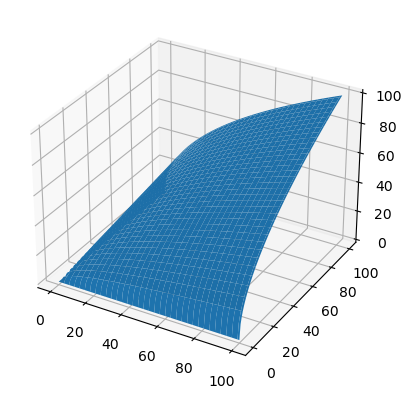

In [11]:
x_values = np.arange(0, 101, 1)
y_values = np.arange(0, 101, 1)
x_values, y_values = np.meshgrid(x_values, y_values) 
z_values = ((x_values)**(0.5))*((y_values)**(0.5)) 
figure = plt.figure() 
axes = figure.add_subplot(projection='3d') # Get the axes object for the 3D graph
surf = axes.plot_surface(x_values, y_values, z_values)# Plot the surface.

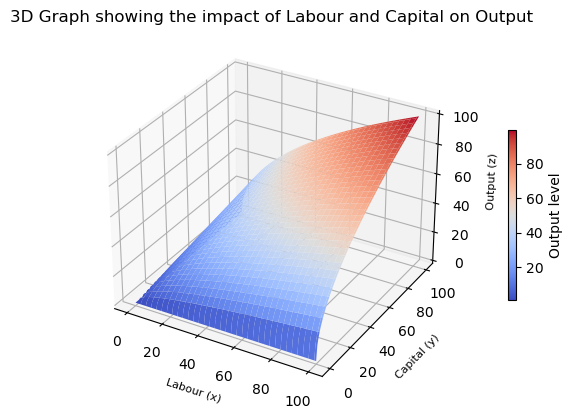

In [23]:
x_values = np.arange(0, 101, 1)
y_values = np.arange(0, 101, 1)
x_values, y_values = np.meshgrid(x_values, y_values)
z_values = ((x_values)**(0.5))*((y_values)**(0.5))
figure = plt.figure()
axes = figure.add_subplot(projection='3d')
#figure, axes = plt.subplots(subplot_kw={"projection": "3d"})
surf = axes.plot_surface(x_values,y_values,z_values, cmap=colourmap.coolwarm)
figure.colorbar(surf, shrink=0.46, anchor = (0.4, 0.5), label="Output level")
plt.title("3D Graph showing the impact of Labour and Capital on Output")
axes.set_xlabel('Labour (x)' , fontsize=8)
axes.set_ylabel('Capital (y)', fontsize=8)
axes.set_zlabel('Output (z)', fontsize=8)
plt.show()


Are there any peaks?
<br>
<br>
It must be noted that three dimensional graphs could make it difficult to carry out any further analysis, for example, finding the combination of Labour and Capital that maximises output when tending to positive infinity.

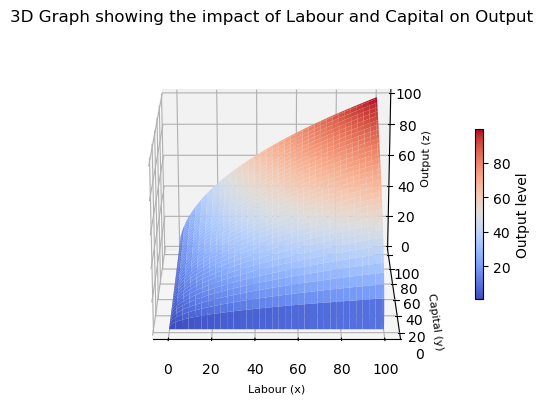

In [24]:
x_values = np.arange(0, 101, 1)
y_values = np.arange(0, 101, 1)
x_values, y_values = np.meshgrid(x_values, y_values)
z_values = ((x_values)**(0.5))*((y_values)**(0.5))
figure = plt.figure()
axes = figure.add_subplot(projection='3d')
#figure, axes = plt.subplots(subplot_kw={"projection": "3d"})
surf = axes.plot_surface(x_values,y_values,z_values, cmap=colourmap.coolwarm)
figure.colorbar(surf, shrink=0.46, anchor = (-0.2, 0.5), label="Output level")
plt.title("3D Graph showing the impact of Labour and Capital on Output")
axes.set_xlabel('Labour (x)' , fontsize=8)
axes.set_ylabel('Capital (y)', fontsize=8)
axes.set_zlabel('Output (z)', fontsize=8)
for angle in range(0, 360):
    axes.view_init(20, -90)
    plt.show()


### Constrained optimisation (labour capital)

<div style="text-align: justify">If we were to introduce a cost constraint on this firm, we can find the optimal combination of Labour and Capital when trying to maximise output.
<br>
<br>
Let us assume the same production function as before, but now the firm is constrained to costs where the an extra unit of labour and capital costs 25 units and 250 units, respectively and has a budget of 2,500 units.
<br>
<br>
We can we set up the optimisation problem as follows:
<br>
<br>
$$ \underset{L,K}{\max} \ L^{0.5} K^{0.5} \\ \text{s.t.} \\ \\ 25L + 250K = 2,500 $$ 
<br>
<br>
Or through a Lagrangian function:
<br>
<br>
$$ \underset{L,K,λ}{\max} \ L(L, K , λ) = L^{0.5} K^{0.5} + λ(2,500 − 25L − 250K) $$
<br>
</div>

Let us write costs and budget values.

In [5]:
cost_labour = 25
cost_capital = 250
budget = 2500

Let us write/compute the minima and maxima values of our production factors (labour and capital, respectively).

In [2]:
labour_min = 0
labour_max = budget / cost_labour
capital_min = 0
capital_max = budget / cost_capital

Let us define the functions to compute 
<br>
* quantities of labour and capital (as a function of the other production factor and budget);
* quantity of output (as a function of the two production factors). 
<br>

**Note**: at this stage, the second definition is redundant. Nevertheless, it is necessary if we want to find the optimal values. 

In [3]:
def n_labour_bc(n_capital, budget):
    return (budget - cost_capital * n_capital) / cost_labour
def n_capital_bc(n_labour, budget):
    return (budget - cost_labour * n_labour) / cost_capital
def output_fc(n_labour, n_capital):
    return (n_labour**(1/2)) * (n_capital**(1/2))

Let us draw the contour plot. 

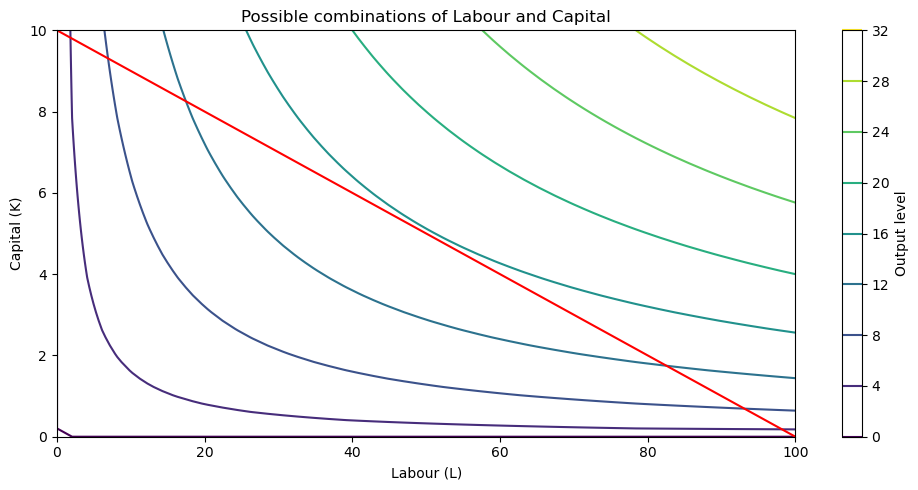

In [6]:
fig, (ax_r) = plt.subplots(figsize = (10, 5))
labour_axis = np.linspace(labour_min, labour_max)
capital_axis = np.linspace(capital_min, capital_max)
labour_grid, capital_grid = np.meshgrid(labour_axis, capital_axis)

im2 = ax_r.contour(output_fc(labour_grid,capital_grid), extent=[labour_min, labour_max, capital_min, capital_max]) 
ax_r.plot(labour_axis, n_capital_bc(labour_axis, budget), 'r') # adding the budget constraint
ax_r.set_xlabel('Labour (L)')
ax_r.set_ylabel('Capital (K)')
ax_r.set_title('Possible combinations of Labour and Capital')

plt.colorbar(im2,ax=ax_r, label="Output level")
plt.tight_layout() 

Let us now find the optimal values by using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize_scalar.html'>**minimize_scalar**</a>, which is part of **scipy.optimize** (that, in turn, is part of the library **scipy**). 

In [ ]:
from scipy.optimize import minimize_scalar

def min_output(n_labour):
    n_capital = n_capital_bc(n_labour, budget)
    return -output_fc(n_labour, n_capital)

result_max = minimize_scalar(min_output)
print(result_max)

Let us store the optimal quantity of labour and compute the optimal quantity of capital and the maximum value of output, respectively.

In [ ]:
n_labour_max_value = result_max.x
n_capital_max_value = n_capital_bc(n_labour_max_value, budget)
max_output_value = output_fc(n_labour_max_value, n_capital_max_value)

Let us present our findings in different ways. 

In [ ]:
print(n_labour_max_value, n_capital_max_value, max_output_value)
print(round(n_labour_max_value,2), round(n_capital_max_value,2), round(max_output_value,2))
print(f'Optimal values for labour, capital, and output are, respectively, {n_labour_max_value:.2f}, '
      f'{n_capital_max_value:.2f}, {max_output_value:.2f}.')